In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#filename="/content/gdrive/My Drive/WSN-DS.csv"
#filename="/content/gdrive/MyDrive/diabetes/diabetes_from_DAT263x_Lab01.csv"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# importing the dataset
dataset = pd.read_csv(filename)

In [ ]:
dataset.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [ ]:
dataset.shape

(15000, 10)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [ ]:
dataset.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [ ]:
df = pd.DataFrame(dataset)

In [ ]:
df=df.drop('PatientID', axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  int64  
 1   PlasmaGlucose           15000 non-null  int64  
 2   DiastolicBloodPressure  15000 non-null  int64  
 3   TricepsThickness        15000 non-null  int64  
 4   SerumInsulin            15000 non-null  int64  
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  int64  
 8   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [ ]:
df.shape

(15000, 9)

In [ ]:
X = df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
Y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
(pd.Series(Y)).value_counts()

0    10000
1     5000
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


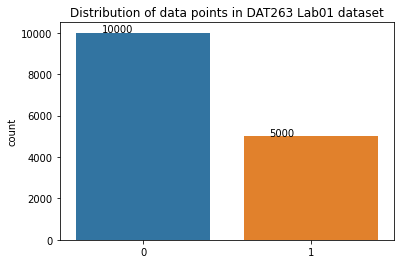

In [ ]:
#fig = plt.figure(figsize = (15,12))
plt.title('Distribution of data points in DAT263 Lab01 dataset')
g = sns.countplot(Y)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+5))

In [ ]:
import random as rn
# manual parameters
RANDOM_SEED = 42

# setting random seeds for libraries to ensure reproducibility
np.random.seed(RANDOM_SEED)
rn.seed(RANDOM_SEED)

In [ ]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d (What are you? An alien that can visualise >3d?). Make sure the "dimensions" argument is in (2, 3)')

    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    
    # counting dimensions
    # if dimensions == 3: ax = fig.add_subplot(111, projection='3d')

    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Normal'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Diabetic'
    )

    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as);
    plt.show;

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


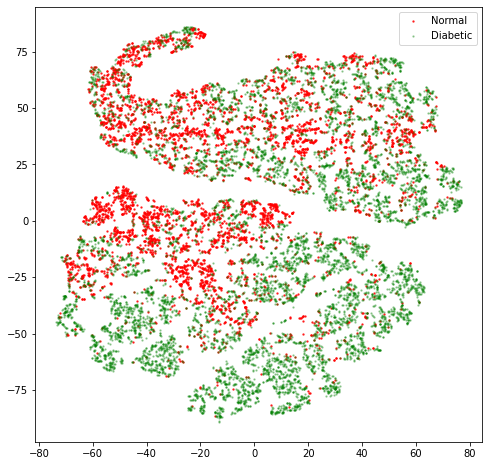

In [ ]:
tsne_scatter(X, Y, dimensions=2, save_as='tsne_initial_2d.png')

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(X)
X = st.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=6)

In [ ]:
(pd.Series(y_test)).value_counts()

0    1972
1    1028
dtype: int64

In [ ]:
(pd.Series(y_train)).value_counts()

0    8028
1    3972
dtype: int64

In [ ]:
import time
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB, GaussianNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
# Train SVM Model
start=time.time()
SVM_Classifier = SVC(probability=True)
SVM_Classifier.fit(X_train, y_train); 
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 21.816938877105713


In [ ]:
# Train MLPClassifier Model
start=time.time()
MLP_Classifier = MLPClassifier((50), learning_rate_init=0.01,
                               alpha=0.001, max_iter=1000, random_state=17)
MLP_Classifier.fit(X_train, y_train)
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 6.73768949508667


In [ ]:
# Train XGBClassifier Model
start=time.time()
XGB_Classifier = XGBClassifier()
XGB_Classifier.fit(X_train, y_train); 
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 0.7441706657409668


In [ ]:
# Train KNeighborsClassifier Model
start=time.time()
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 0.023960113525390625


In [ ]:
# Train LogisticRegression Model
start=time.time()
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);
end=time.time()
timing= end-start
print("The timing information is",timing)

The timing information is 0.953087329864502


In [ ]:
# Train Bernoulli Naive Baye Model
start=time.time()
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)
end=time.time()
timing=end-start
print("The timing information is",timing)

The timing information is 0.012960433959960938


In [ ]:
# Train Gaussian Naive Baye Model
start=time.time()
GNB_Classifier = GaussianNB()
GNB_Classifier.fit(X_train, y_train)
end=time.time()
timing=end-start
print("The timing information is",timing)

The timing information is 0.006826877593994141


In [ ]:
# Train Decision Tree Model
start=time.time()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train)
end=time.time()
timing=end-start 
print("The timing information is",timing)

The timing information is 0.09376382827758789


In [ ]:
classifier=RandomForestClassifier() 
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Using the random forest classifier for the prediction 
start=time.time()
classifier=RandomForestClassifier() 
classifier=classifier.fit(X_train, y_train)
end=time.time()
timing=end-start
print("The timing information is",timing)

The timing information is 1.5688259601593018


In [ ]:
print(X_train.shape)  
print(y_train.shape)

(12000, 8)
(12000,)


In [ ]:
LGR_Classifier.predict(X_train)

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
y_pred = LGR_Classifier.predict(X_train)
metrics.precision_score(X_train, y, average='weighted')

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


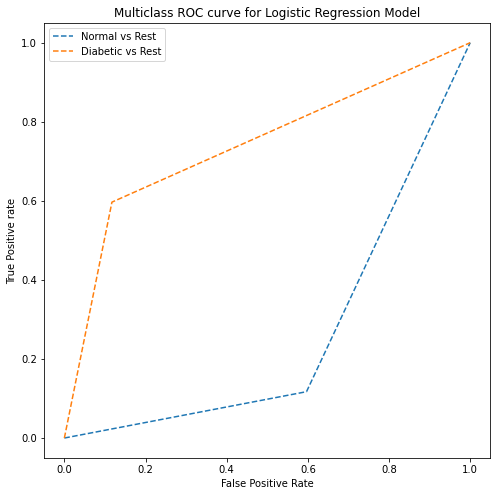


============================== Logistic Regression Model Evaluation ==============================

Cross Validation Mean Score:
 0.7885833333333333

Model Accuracy:
 0.7880833333333334

Model Precision:
 0.7825841920821164

Model Recall:
 0.7880833333333334

Model F1 Score:
 0.7826562836501785

Confusion matrix:
 [[7087  941]
 [1602 2370]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.82      0.88      0.85      8028
    Diabetic       0.72      0.60      0.65      3972

    accuracy                           0.79     12000
   macro avg       0.77      0.74      0.75     12000
weighted avg       0.78      0.79      0.78     12000



ROC AUC Score:
 0.7397309943897266


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


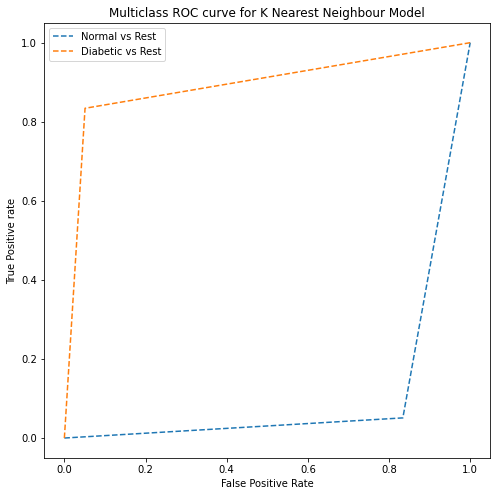


============================== K Nearest Neighbour Model Evaluation ==============================

Cross Validation Mean Score:
 0.8690833333333334

Model Accuracy:
 0.911

Model Precision:
 0.9103691967431071

Model Recall:
 0.911

Model F1 Score:
 0.9102363323022449

Confusion matrix:
 [[7619  409]
 [ 659 3313]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.92      0.95      0.93      8028
    Diabetic       0.89      0.83      0.86      3972

    accuracy                           0.91     12000
   macro avg       0.91      0.89      0.90     12000
weighted avg       0.91      0.91      0.91     12000



ROC AUC Score:
 0.891570966872743


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


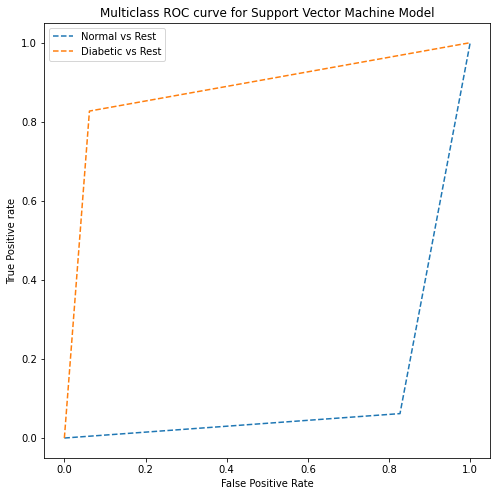


============================== Support Vector Machine Model Evaluation ==============================

Cross Validation Mean Score:
 0.88825

Model Accuracy:
 0.9014166666666666

Model Precision:
 0.9006591062972987

Model Recall:
 0.9014166666666666

Model F1 Score:
 0.900781809301432

Confusion matrix:
 [[7532  496]
 [ 687 3285]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.92      0.94      0.93      8028
    Diabetic       0.87      0.83      0.85      3972

    accuracy                           0.90     12000
   macro avg       0.89      0.88      0.89     12000
weighted avg       0.90      0.90      0.90     12000



ROC AUC Score:
 0.8826277590367249


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


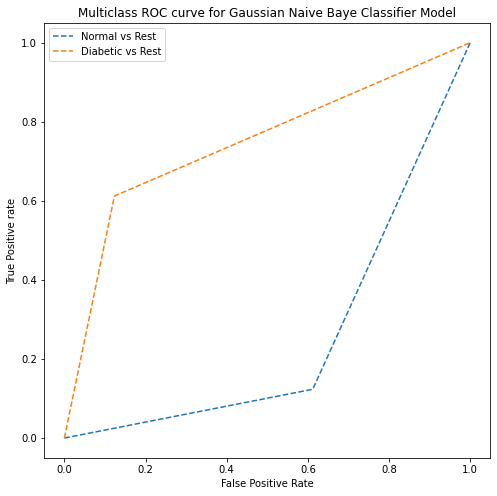


============================== Gaussian Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7889999999999999

Model Accuracy:
 0.7890833333333334

Model Precision:
 0.7840433178452281

Model Recall:
 0.7890833333333334

Model F1 Score:
 0.7847225067310022

Confusion matrix:
 [[7038  990]
 [1541 2431]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.82      0.88      0.85      8028
    Diabetic       0.71      0.61      0.66      3972

    accuracy                           0.79     12000
   macro avg       0.77      0.74      0.75     12000
weighted avg       0.78      0.79      0.78     12000



ROC AUC Score:
 0.74435792701376


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


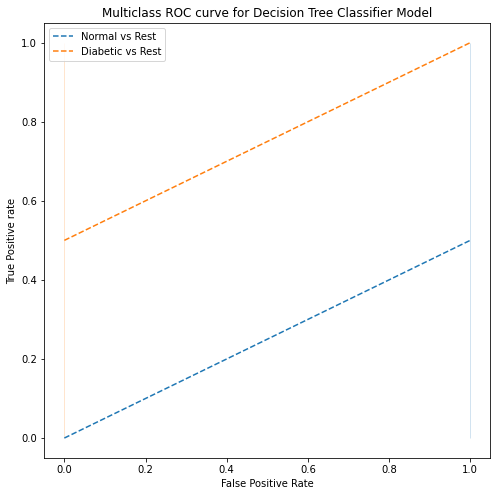


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9061666666666666

Model Accuracy:
 1.0

Model Precision:
 1.0

Model Recall:
 1.0

Model F1 Score:
 1.0

Confusion matrix:
 [[8028    0]
 [   0 3972]]

Classification report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      8028
    Diabetic       1.00      1.00      1.00      3972

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



ROC AUC Score:
 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


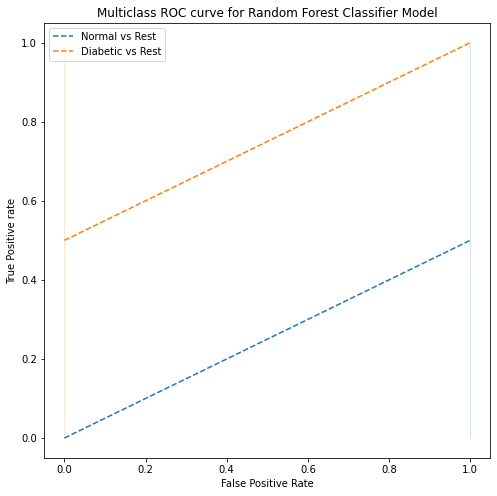


============================== Random Forest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9395

Model Accuracy:
 1.0

Model Precision:
 1.0

Model Recall:
 1.0

Model F1 Score:
 1.0

Confusion matrix:
 [[8028    0]
 [   0 3972]]

Classification report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      8028
    Diabetic       1.00      1.00      1.00      3972

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000



ROC AUC Score:
 1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


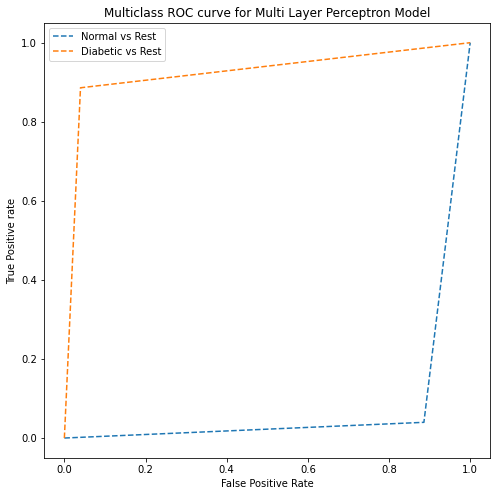


============================== Multi Layer Perceptron Model Evaluation ==============================

Cross Validation Mean Score:
 0.9253333333333333

Model Accuracy:
 0.9356666666666666

Model Precision:
 0.9353582980088334

Model Recall:
 0.9356666666666666

Model F1 Score:
 0.935381001693241

Confusion matrix:
 [[7709  319]
 [ 453 3519]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.94      0.96      0.95      8028
    Diabetic       0.92      0.89      0.90      3972

    accuracy                           0.94     12000
   macro avg       0.93      0.92      0.93     12000
weighted avg       0.94      0.94      0.94     12000



ROC AUC Score:
 0.9231078686831738


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


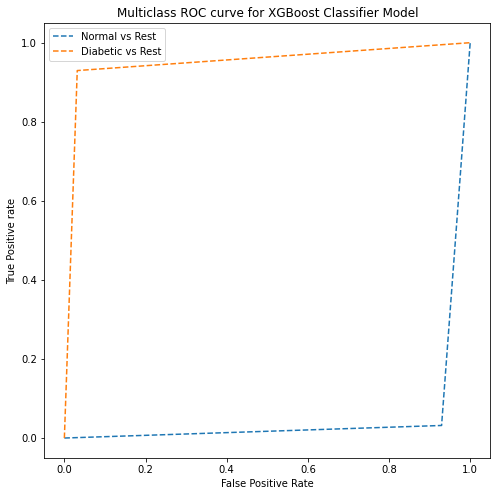


============================== XGBoost Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9501666666666665

Model Accuracy:
 0.9554166666666667

Model Precision:
 0.9553545075440949

Model Recall:
 0.9554166666666667

Model F1 Score:
 0.9553809479584109

Confusion matrix:
 [[7773  255]
 [ 280 3692]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.97      0.97      0.97      8028
    Diabetic       0.94      0.93      0.93      3972

    accuracy                           0.96     12000
   macro avg       0.95      0.95      0.95     12000
weighted avg       0.96      0.96      0.96     12000



ROC AUC Score:
 0.9488713596069347


In [ ]:
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns

models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('K Nearest Neighbour',KNN_Classifier))
models.append(('Support Vector Machine',SVM_Classifier))
models.append(('Gaussian Naive Baye Classifier', GNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', classifier))
models.append(('Multi Layer Perceptron', MLP_Classifier))
models.append(('XGBoost Classifier', XGB_Classifier))


for i, v in models:
    y_pred = v.predict(X_train)
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall = metrics.recall_score(y_train, y_pred, average='weighted')
    f1score = metrics.f1_score(y_train, y_pred, average='weighted')
    confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
    classification = metrics.classification_report(y_train, y_pred, target_names=['Normal', 'Diabetic'])
    predictions_proba = v.predict_proba(X_train)
    #print(predictions_proba.shape)
    #print(y_train.shape)
    #predictions_proba=predictions_proba[:,0]
    #print(predictions_proba.shape)
    rocaucscore=metrics.roc_auc_score(y_train.reshape(-1,1),y_pred.reshape(-1,1),average='macro',multi_class="ovr")
    fpr = {}
    tpr = {}
    thresh ={}
    for j in range(2):    
        fpr[j], tpr[j], thresh[j] = metrics.roc_curve(y_train, y_pred, pos_label=j)
    fig, ax = plt.subplots(figsize=(8,8))
    label = ['Normal', 'Diabetic']
    for j in range(2):
        sns.lineplot(fpr[j], tpr[j], linestyle='--', label=f'{label[j]} vs Rest', ax=ax)
    plt.title('Multiclass ROC curve for {} Model'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print ("Model Precision:" "\n", precision)
    print()
    print ("Model Recall:" "\n", recall)
    print()
    print ("Model F1 Score:" "\n", f1score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print()  
    print("ROC AUC Score:" "\n", rocaucscore) 


============================== Logistic Regression Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


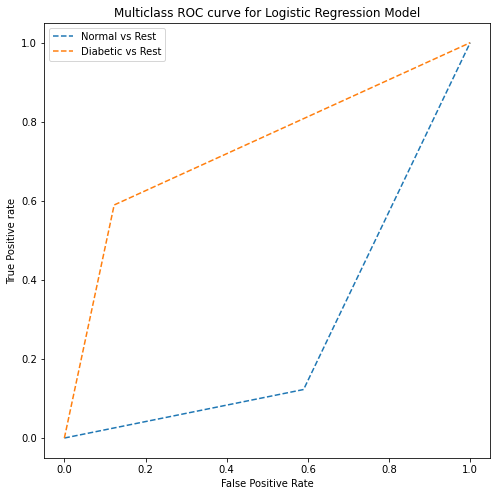

Cross Validation Mean Score:
 0.7766666666666666

Model Accuracy:
 0.7786666666666666

Model Precision:
 0.7733098244137383

Model Recall:
 0.7786666666666666

Model F1 Score:
 0.7728785916613415

Confusion matrix:
 [[1730  242]
 [ 422  606]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.80      0.88      0.84      1972
    Diabetic       0.71      0.59      0.65      1028

    accuracy                           0.78      3000
   macro avg       0.76      0.73      0.74      3000
weighted avg       0.77      0.78      0.77      3000



ROC AUC Score:
 0.733388055342894


TPR:
 [0.87728195 0.58949416]


FPR:
 [0.41050584 0.12271805]


TNR:
 [0.58949416 0.87728195]


FNR:
 [0.12271805 0.41050584]

============================== K Nearest Neighbour Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


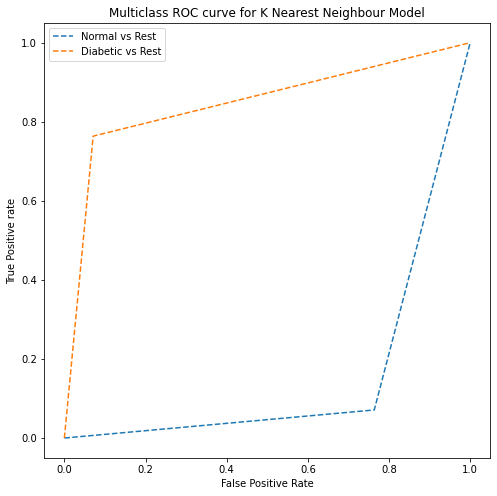

Cross Validation Mean Score:
 0.8506666666666666

Model Accuracy:
 0.8723333333333333

Model Precision:
 0.8711576598285032

Model Recall:
 0.8723333333333333

Model F1 Score:
 0.8705914222681241

Confusion matrix:
 [[1832  140]
 [ 243  785]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.88      0.93      0.91      1972
    Diabetic       0.85      0.76      0.80      1028

    accuracy                           0.87      3000
   macro avg       0.87      0.85      0.85      3000
weighted avg       0.87      0.87      0.87      3000



ROC AUC Score:
 0.8463123811177496


TPR:
 [0.92900609 0.76361868]


FPR:
 [0.23638132 0.07099391]


TNR:
 [0.76361868 0.92900609]


FNR:
 [0.07099391 0.23638132]

============================== Support Vector Machine Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


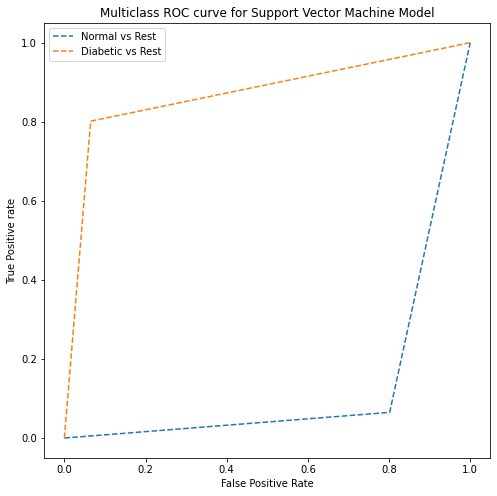

Cross Validation Mean Score:
 0.8543333333333333

Model Accuracy:
 0.8893333333333333

Model Precision:
 0.8884506083683473

Model Recall:
 0.8893333333333333

Model F1 Score:
 0.8882555304286648

Confusion matrix:
 [[1844  128]
 [ 204  824]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.90      0.94      0.92      1972
    Diabetic       0.87      0.80      0.83      1028

    accuracy                           0.89      3000
   macro avg       0.88      0.87      0.87      3000
weighted avg       0.89      0.89      0.89      3000



ROC AUC Score:
 0.8683238490619648


TPR:
 [0.93509128 0.80155642]


FPR:
 [0.19844358 0.06490872]


TNR:
 [0.80155642 0.93509128]


FNR:
 [0.06490872 0.19844358]

============================== Gaussian Naive Baye Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


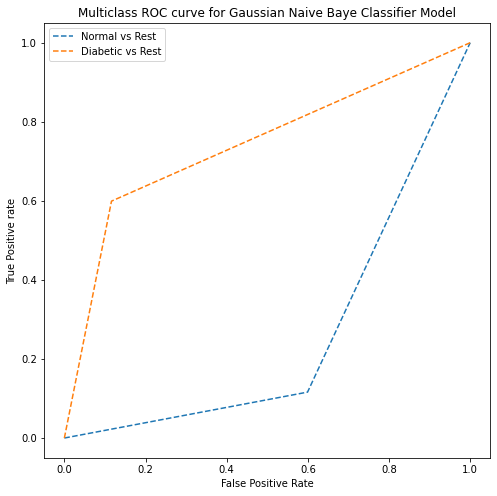

Cross Validation Mean Score:
 0.7853333333333333

Model Accuracy:
 0.7863333333333333

Model Precision:
 0.7814641533610658

Model Recall:
 0.7863333333333333

Model F1 Score:
 0.7806324843799678

Confusion matrix:
 [[1743  229]
 [ 412  616]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.81      0.88      0.84      1972
    Diabetic       0.73      0.60      0.66      1028

    accuracy                           0.79      3000
   macro avg       0.77      0.74      0.75      3000
weighted avg       0.78      0.79      0.78      3000



ROC AUC Score:
 0.7415480146170907


TPR:
 [0.88387424 0.59922179]


FPR:
 [0.40077821 0.11612576]


TNR:
 [0.59922179 0.88387424]


FNR:
 [0.11612576 0.40077821]

============================== Decision Tree Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


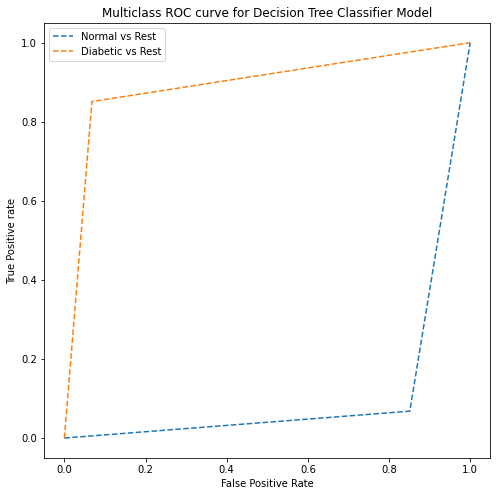

Cross Validation Mean Score:
 0.8936666666666667

Model Accuracy:
 0.9043333333333333

Model Precision:
 0.9039789266433008

Model Recall:
 0.9043333333333333

Model F1 Score:
 0.9041165003082637

Confusion matrix:
 [[1838  134]
 [ 153  875]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.92      0.93      0.93      1972
    Diabetic       0.87      0.85      0.86      1028

    accuracy                           0.90      3000
   macro avg       0.90      0.89      0.89      3000
weighted avg       0.90      0.90      0.90      3000



ROC AUC Score:
 0.8916079983583397


TPR:
 [0.93204868 0.85116732]


FPR:
 [0.14883268 0.06795132]


TNR:
 [0.85116732 0.93204868]


FNR:
 [0.06795132 0.14883268]

============================== Random Forest Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


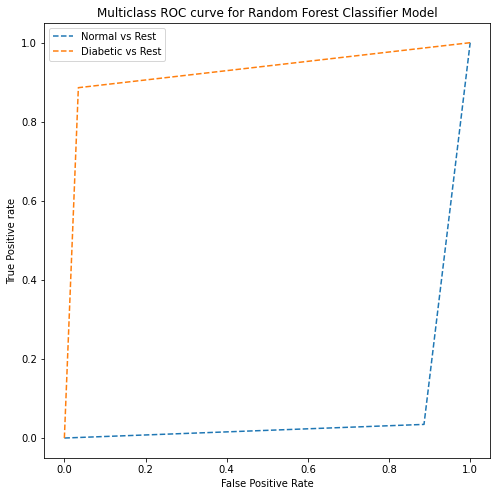

Cross Validation Mean Score:
 0.9299999999999999

Model Accuracy:
 0.9383333333333334

Model Precision:
 0.9381444138554036

Model Recall:
 0.9383333333333334

Model F1 Score:
 0.9379589218850978

Confusion matrix:
 [[1904   68]
 [ 117  911]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.94      0.97      0.95      1972
    Diabetic       0.93      0.89      0.91      1028

    accuracy                           0.94      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.94      0.94      0.94      3000



ROC AUC Score:
 0.9258520059036629


TPR:
 [0.96551724 0.88618677]


FPR:
 [0.11381323 0.03448276]


TNR:
 [0.88618677 0.96551724]


FNR:
 [0.03448276 0.11381323]

============================== Multi Layer Perceptron Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


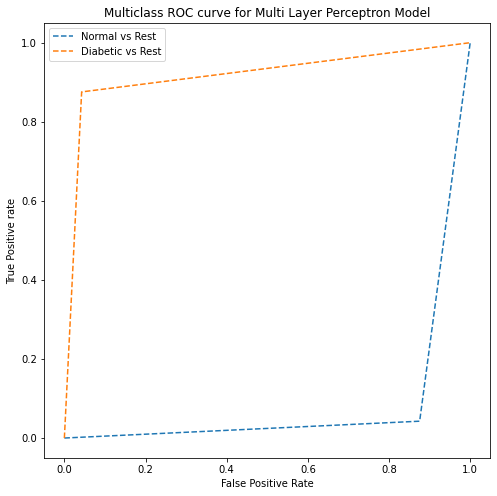

Cross Validation Mean Score:
 0.8973333333333333

Model Accuracy:
 0.9293333333333333

Model Precision:
 0.9290125177442251

Model Recall:
 0.9293333333333333

Model F1 Score:
 0.9289504723580949

Confusion matrix:
 [[1888   84]
 [ 128  900]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.94      0.96      0.95      1972
    Diabetic       0.91      0.88      0.89      1028

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.93      0.93      0.93      3000



ROC AUC Score:
 0.9164450162192879


TPR:
 [0.95740365 0.87548638]


FPR:
 [0.12451362 0.04259635]


TNR:
 [0.87548638 0.95740365]


FNR:
 [0.04259635 0.12451362]

============================== XGBoost Classifier Model Evaluation ==============================



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


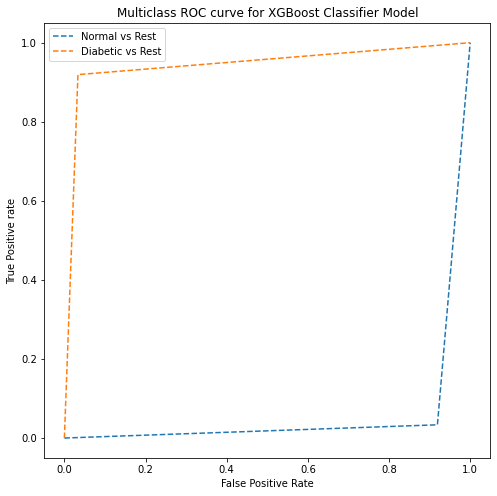

Cross Validation Mean Score:
 0.9423333333333332

Model Accuracy:
 0.9503333333333334

Model Precision:
 0.9501998698081784

Model Recall:
 0.9503333333333334

Model F1 Score:
 0.950232868225539

Confusion matrix:
 [[1906   66]
 [  83  945]]

Classification report:
               precision    recall  f1-score   support

      Normal       0.96      0.97      0.96      1972
    Diabetic       0.93      0.92      0.93      1028

    accuracy                           0.95      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.95      0.95      0.95      3000



ROC AUC Score:
 0.9428960702756883


TPR:
 [0.96653144 0.9192607 ]


FPR:
 [0.0807393  0.03346856]


TNR:
 [0.9192607  0.96653144]


FNR:
 [0.03346856 0.0807393 ]


In [ ]:
from sklearn import metrics
import time
import matplotlib.pyplot as plt
import seaborn as sns

models = []
models.append(('Logistic Regression', LGR_Classifier))
models.append(('K Nearest Neighbour',KNN_Classifier))
models.append(('Support Vector Machine',SVM_Classifier))
models.append(('Gaussian Naive Baye Classifier', GNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Random Forest Classifier', classifier))
models.append(('Multi Layer Perceptron', MLP_Classifier))
models.append(('XGBoost Classifier', XGB_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_test, y_test, cv=10)
    accuracy = metrics.accuracy_score(y_test, v.predict(X_test))
    precision = metrics.precision_score(y_test, v.predict(X_test), average='weighted')
    recall = metrics.recall_score(y_test, v.predict(X_test), average='weighted')
    f1score = metrics.f1_score(y_test, v.predict(X_test), average='weighted')
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_test))
    classification = metrics.classification_report(y_test, v.predict(X_test), target_names=['Normal', 'Diabetic'])
    predictions_proba = v.predict_proba(X_test)
    FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix) 
    FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
    TP = np.diag(confusion_matrix)
    TN = confusion_matrix.sum() - (FP + FN + TP)
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = 1 - TNR
    FNR = 1 - TPR 
    #print(predictions_proba.shape)
    #print(y_train.shape)
    #predictions_proba=predictions_proba[:,0]
    #print(predictions_proba.shape)
    rocaucscore=metrics.roc_auc_score(y_test.reshape(-1,1),v.predict(X_test),average='macro',multi_class="ovr")
    fpr = {}
    tpr = {}
    thresh ={}
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    for j in range(2):    
        fpr[j], tpr[j], thresh[j] = metrics.roc_curve(y_test, v.predict(X_test), pos_label=j)
    fig, ax = plt.subplots(figsize=(8,8))
    label = ['Normal', 'Diabetic']
    for j in range(2):
        sns.lineplot(fpr[j], tpr[j], linestyle='--', label=f'{label[j]} vs Rest', ax=ax)
    plt.title('Multiclass ROC curve for {} Model'.format(i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.show()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print ("Model Precision:" "\n", precision)
    print()
    print ("Model Recall:" "\n", recall)
    print()
    print ("Model F1 Score:" "\n", f1score)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()
    print()  
    print("ROC AUC Score:" "\n", rocaucscore) 
    print()
    print()
    print("TPR:" "\n", TPR)
    print()
    print()
    print("FPR:" "\n", FPR)
    print()
    print()
    print("TNR:" "\n", TNR)
    print()
    print()
    print("FNR:" "\n", FNR)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(X_train)
train_labels = kmean.labels_

In [ ]:
train_labels

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
train_lables = []
for i in train_labels:
  if i == 0:
    train_lables.append(1)
  else:
    train_lables.append(0)

In [ ]:
print('Training Accuracy:',metrics.accuracy_score(y_train, train_lables))
print('Training Precision:',metrics.precision_score(y_train, train_lables))
print('Training Recall:',metrics.recall_score(y_train, train_lables))
print('Training F1 Score:',metrics.f1_score(y_train, train_lables))
print(metrics.classification_report(y_train, train_lables))
print(metrics.confusion_matrix(y_train, train_lables))
print(metrics.roc_auc_score(y_train.reshape(-1,1),train_lables,average='macro',multi_class="ovr"))

Training Accuracy: 0.7714166666666666
Training Precision: 0.6262066132676114
Training Recall: 0.7676233635448136
Training F1 Score: 0.6897409795272028
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      8028
           1       0.63      0.77      0.69      3972

    accuracy                           0.77     12000
   macro avg       0.75      0.77      0.75     12000
weighted avg       0.79      0.77      0.78     12000

[[6208 1820]
 [ 923 3049]]
0.770458418194928


In [ ]:
test_labels = kmean.predict(X_test)
test_lables = []
for i in test_labels:
  if i == 0:
    test_lables.append(1)
  else:
    test_lables.append(0)

In [ ]:
print('Testing Accuracy:',metrics.accuracy_score(y_test, test_lables))
print('Testing Precision:',metrics.precision_score(y_test, test_lables))
print('Testing Recall:',metrics.recall_score(y_test, test_lables))
print('Testing F1 Score:',metrics.f1_score(y_test, test_lables))
print(metrics.classification_report(y_test, test_lables))
print(metrics.confusion_matrix(y_test, test_lables))
print(metrics.roc_auc_score(y_test.reshape(-1,1),test_lables,average='macro',multi_class="ovr"))

Testing Accuracy: 0.7773333333333333
Testing Precision: 0.6472995090016367
Testing Recall: 0.769455252918288
Testing F1 Score: 0.7031111111111112
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1972
           1       0.65      0.77      0.70      1028

    accuracy                           0.78      3000
   macro avg       0.76      0.78      0.76      3000
weighted avg       0.79      0.78      0.78      3000

[[1541  431]
 [ 237  791]]
0.7754477075950466


In [ ]:
pip install -U scikit-learn

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics

In [ ]:
agg = AgglomerativeClustering(n_clusters = 2, compute_distances=True)
agg.fit(X)
train_labels = agg.labels_

In [ ]:
print('Accuracy:',metrics.accuracy_score(Y, train_labels))
print('Precision:',metrics.precision_score(Y, train_labels))
print('Recall:',metrics.recall_score(Y, train_labels))
print('F1 Score:',metrics.f1_score(Y, train_labels))
print(metrics.classification_report(Y, train_labels))
print(metrics.confusion_matrix(Y, train_labels))
print(metrics.roc_auc_score(Y.reshape(-1,1),train_labels,average='macro',multi_class="ovr"))

Accuracy: 0.7648666666666667
Precision: 0.663994655978624
Recall: 0.5964
F1 Score: 0.6283847855863449
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     10000
           1       0.66      0.60      0.63      5000

    accuracy                           0.76     15000
   macro avg       0.74      0.72      0.73     15000
weighted avg       0.76      0.76      0.76     15000

[[8491 1509]
 [2018 2982]]
0.72275


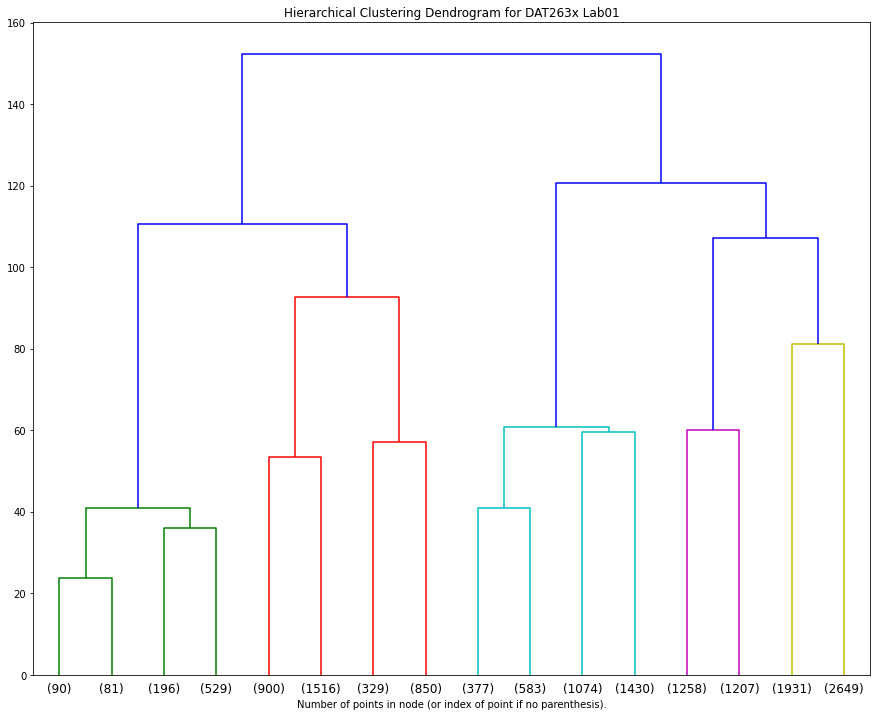

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

fig = plt.figure(figsize = (15,12))
plt.title("Hierarchical Clustering Dendrogram for DAT263x Lab01")
# plot the top three levels of the dendrogram
plot_dendrogram(agg, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()